In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [69]:
customer_df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [70]:
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [71]:
print(customer_df['Customer'].value_counts())

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64


In [72]:
# Rename columns to snake case
customer_df.columns = customer_df.columns.str.lower().str.replace(" ", "_")

In [73]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [74]:
customer_df.drop('customer', axis=1, inplace=True)

In [75]:
numerical_df = customer_df.select_dtypes("number")
categorical_df = customer_df.select_dtypes("object")

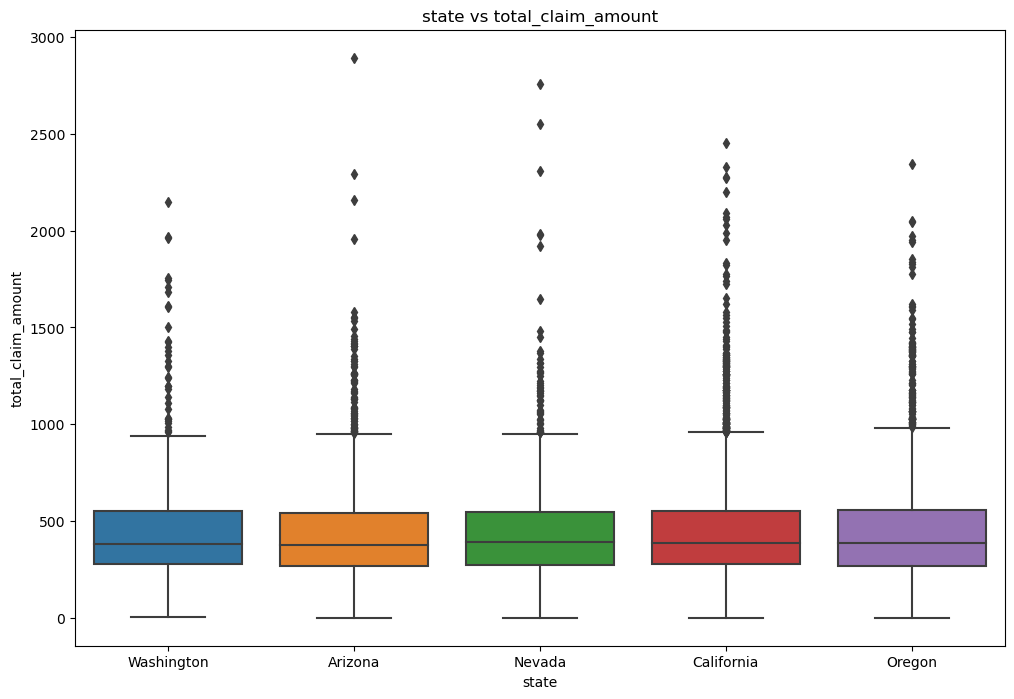

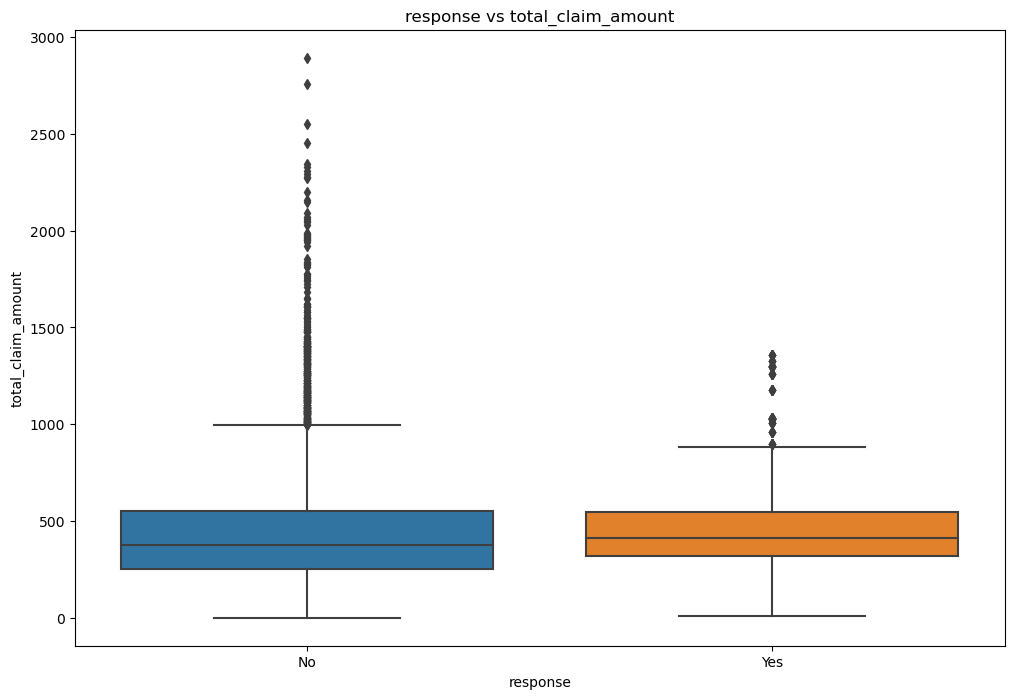

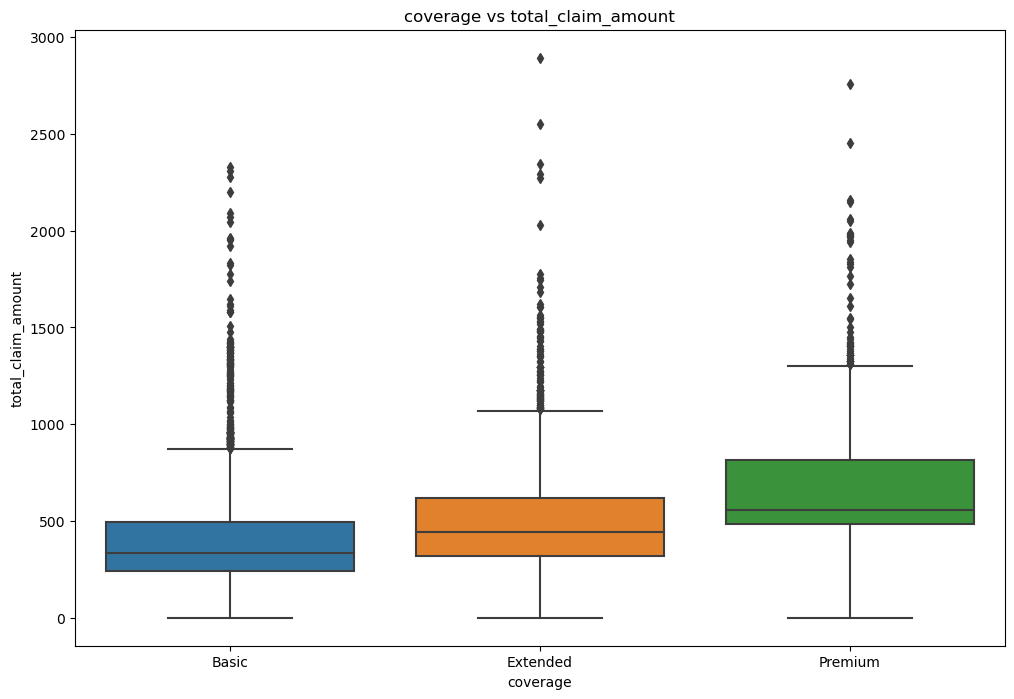

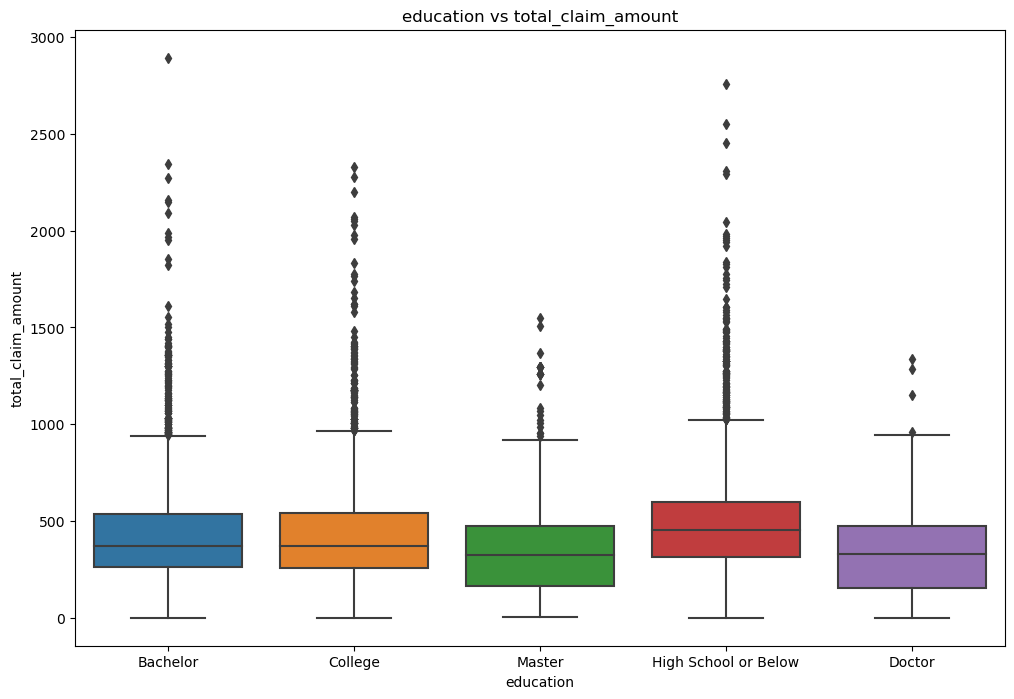

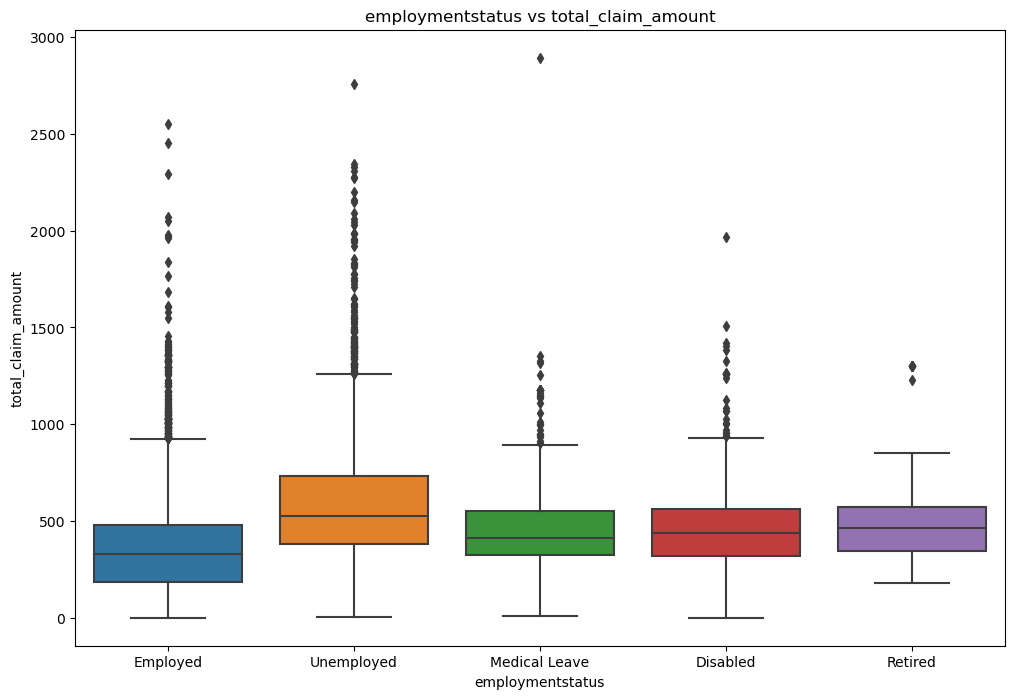

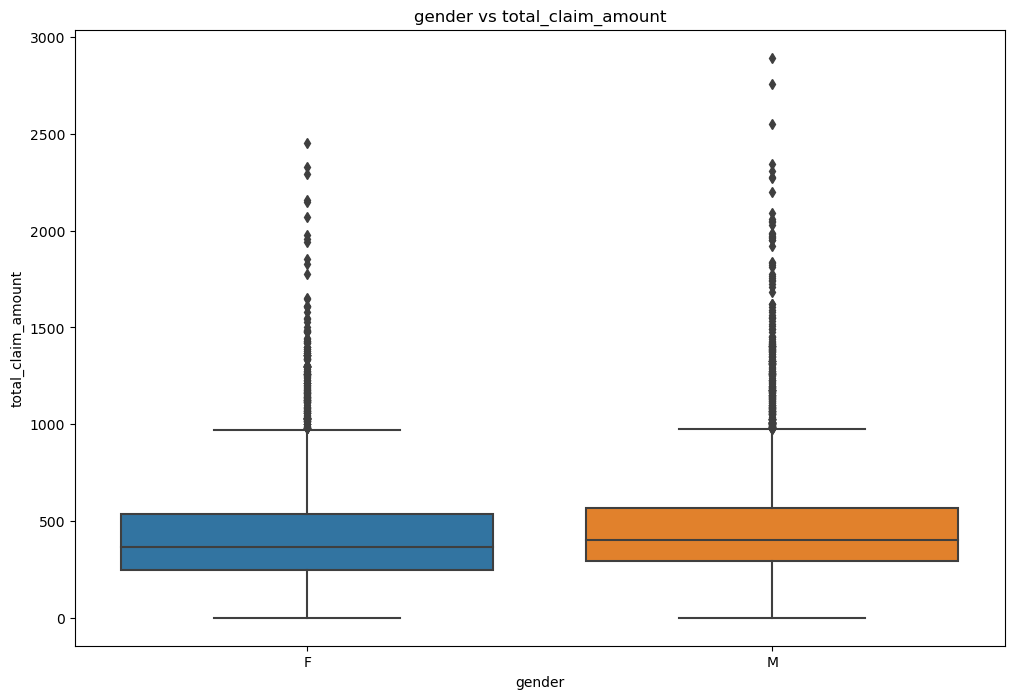

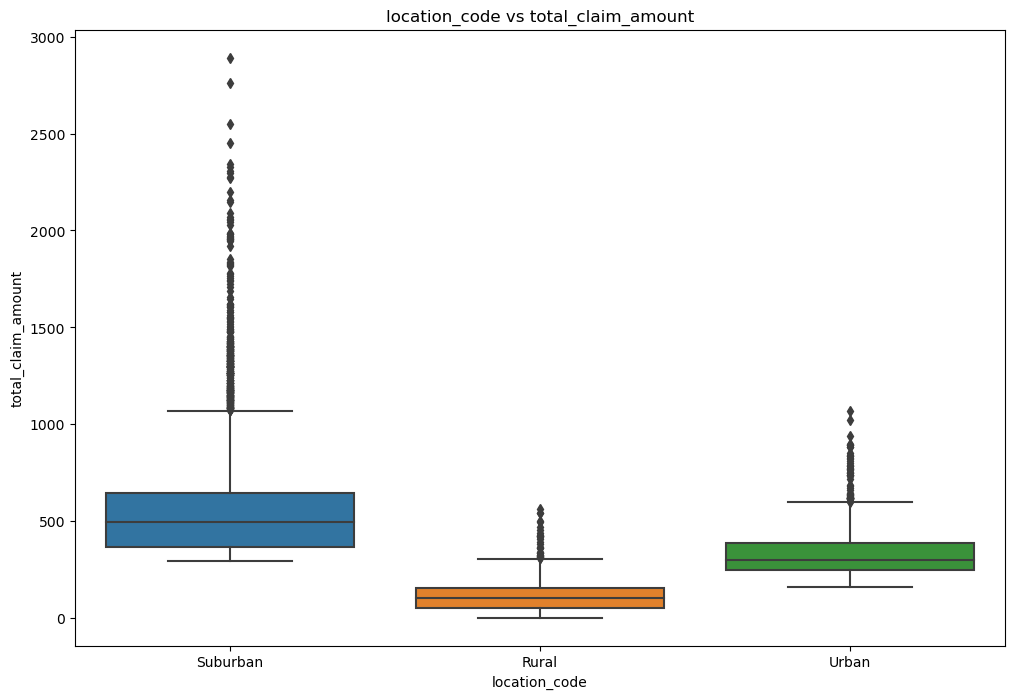

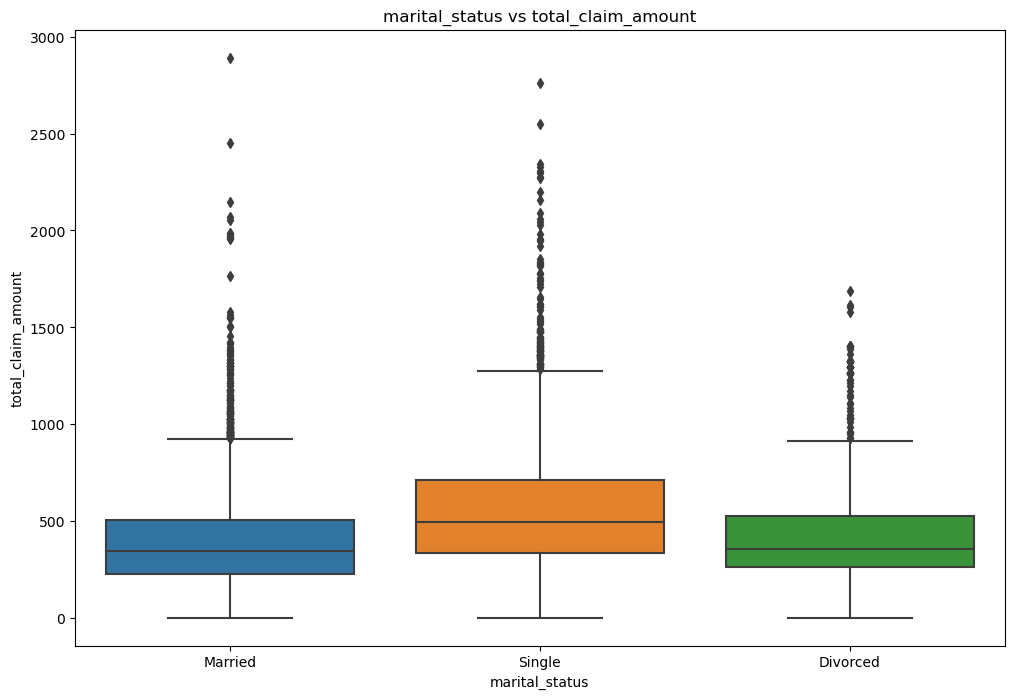

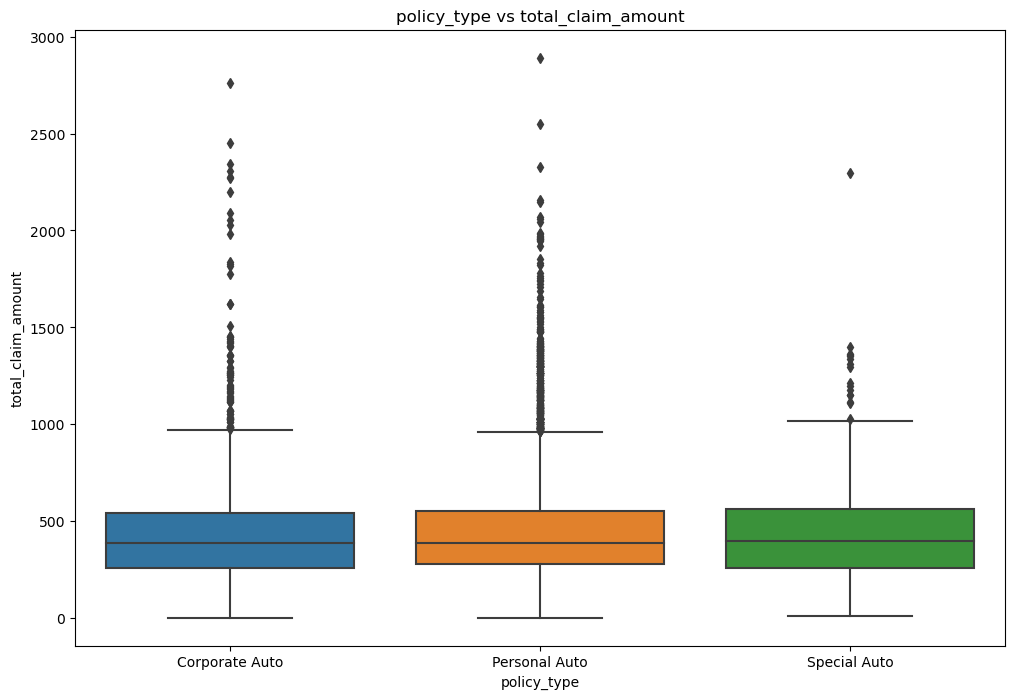

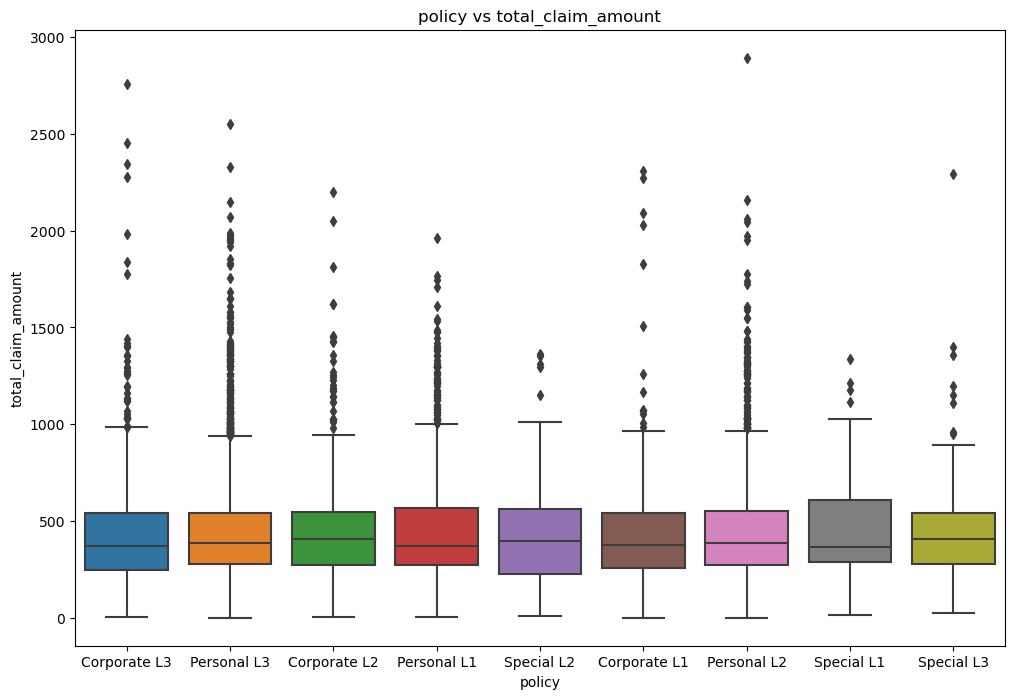

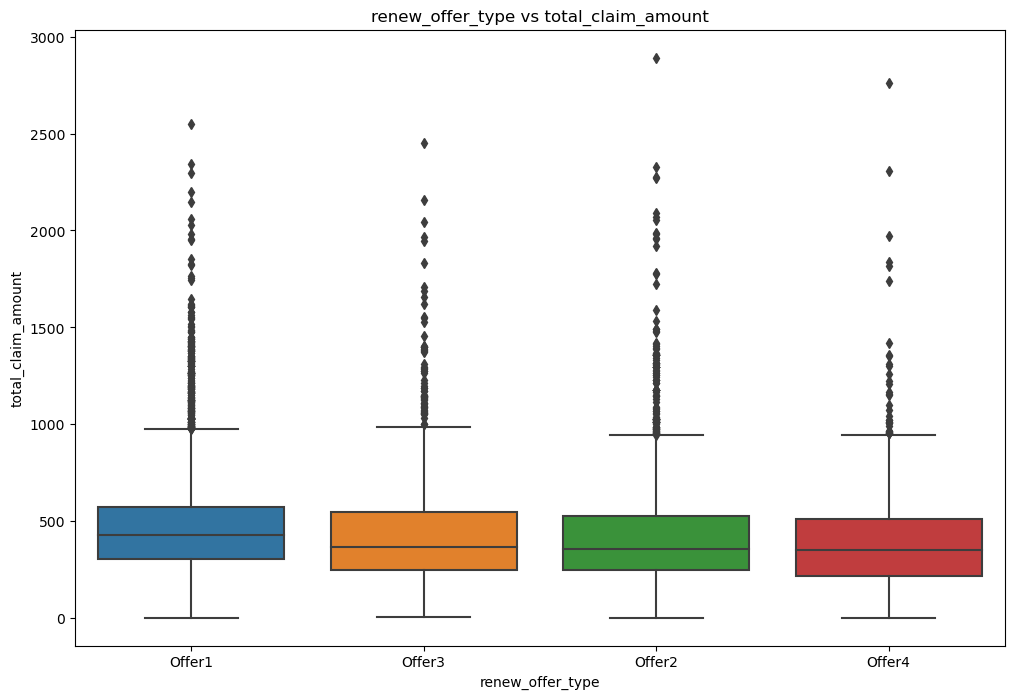

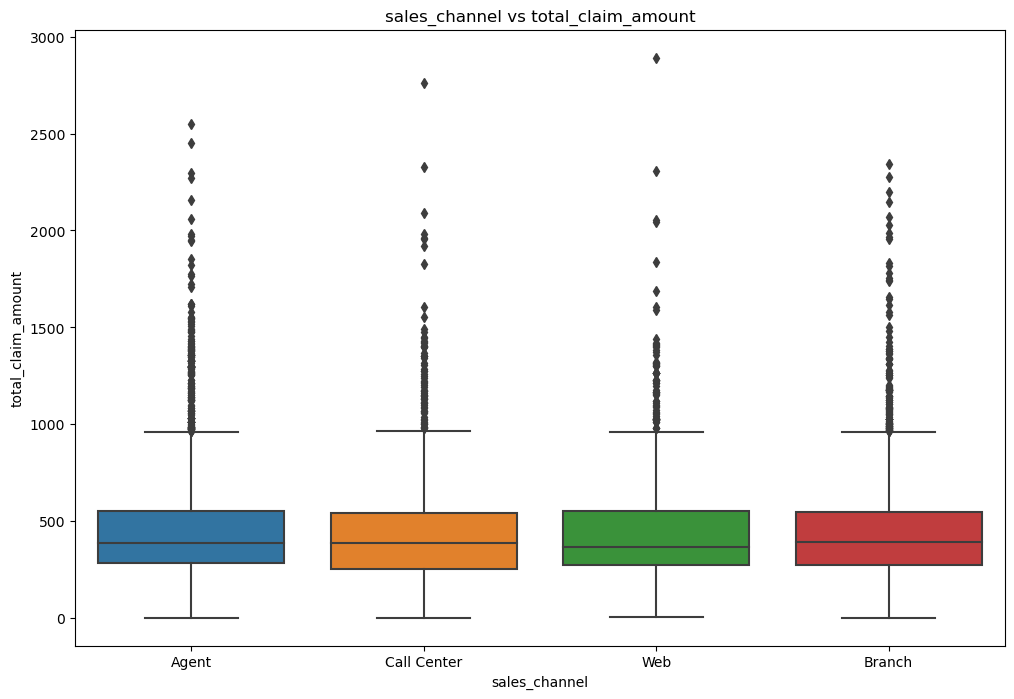

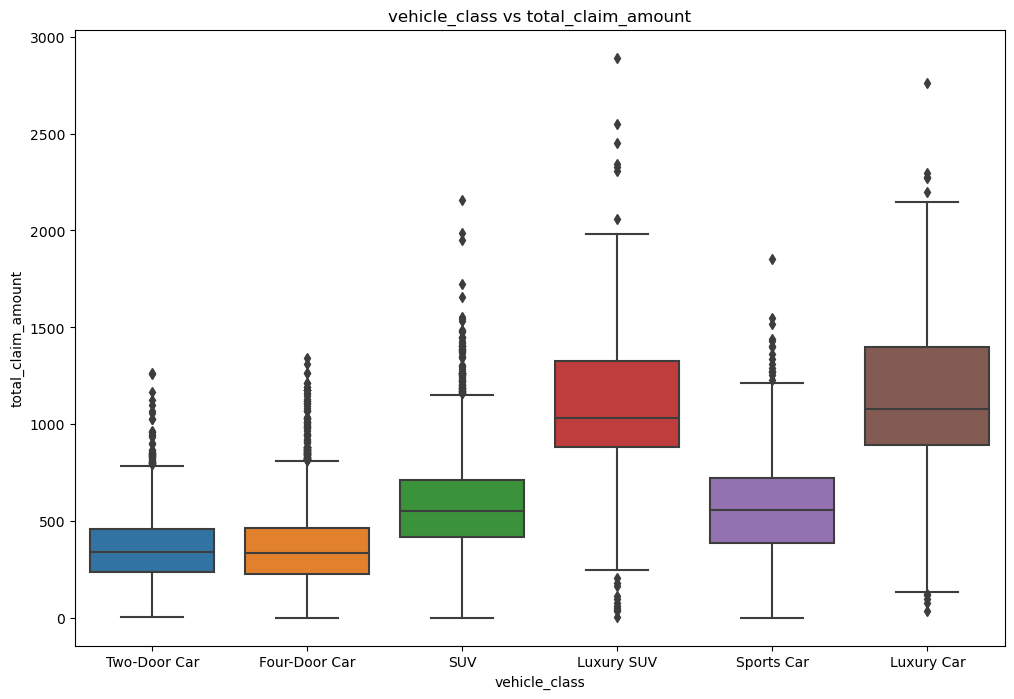

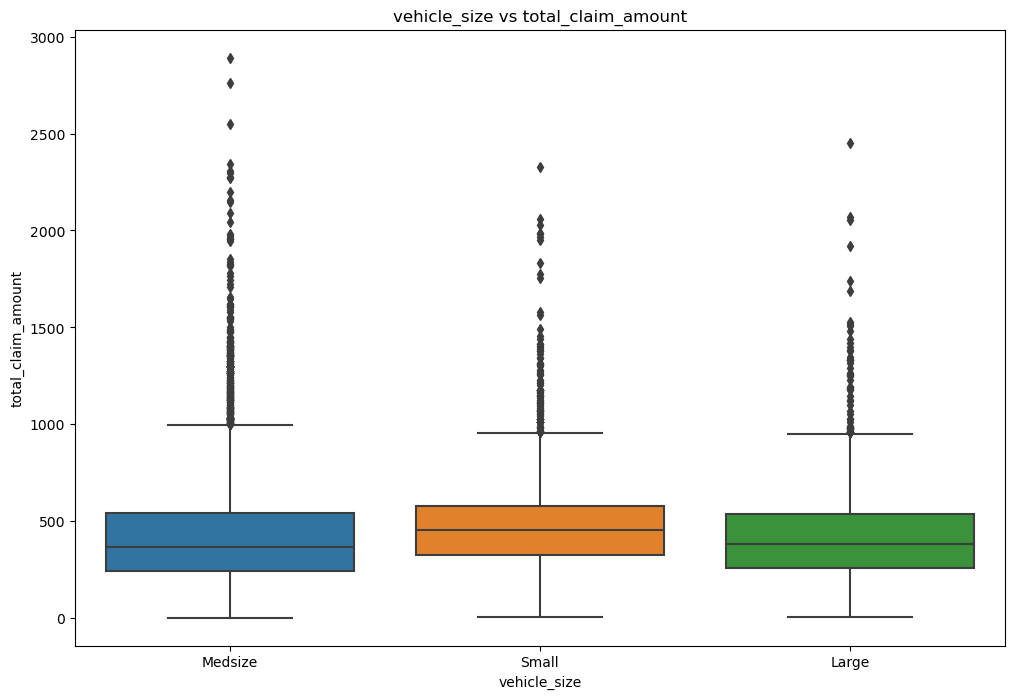

In [76]:
for col in categorical_df.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=col, y='total_claim_amount', data=customer_df)
    plt.title(f'{col} vs total_claim_amount')
    plt.show()

In [77]:
for col in categorical_df.columns:
    print(customer_df[col].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


In [78]:
#Open the categoricals variable we created before

In [79]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

/var/folders/4m/k401q1_d1z3g7xk757s4764c0000gn/T/ipykernel_32174/2044039042.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [80]:
# Plot all the categorical variables with the proper plot. What can you see?

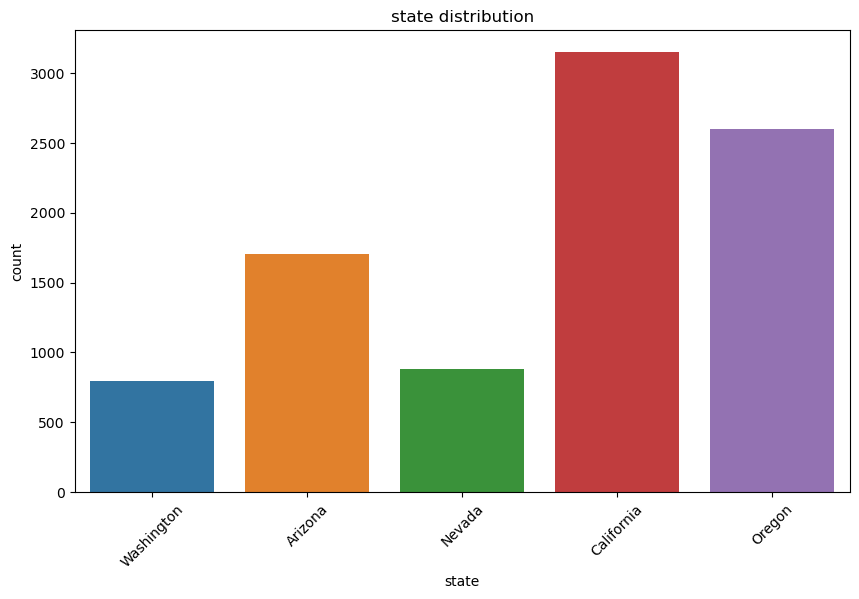

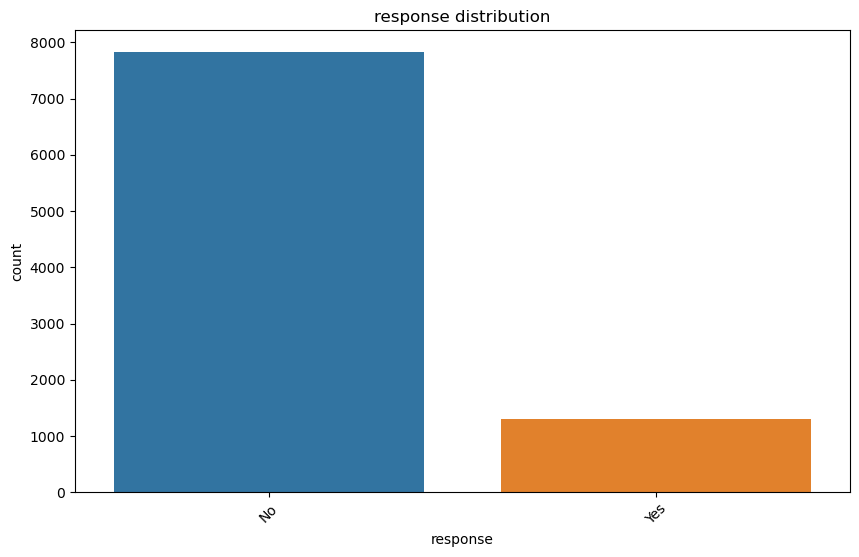

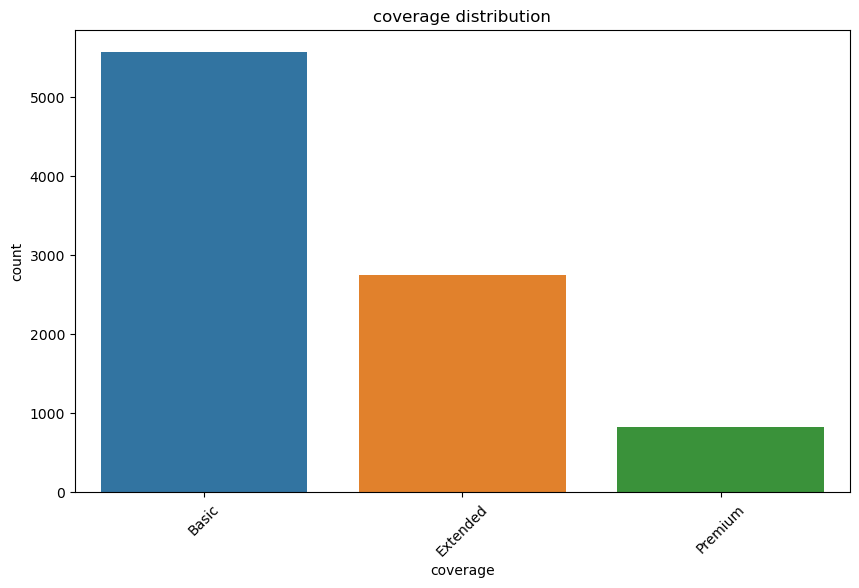

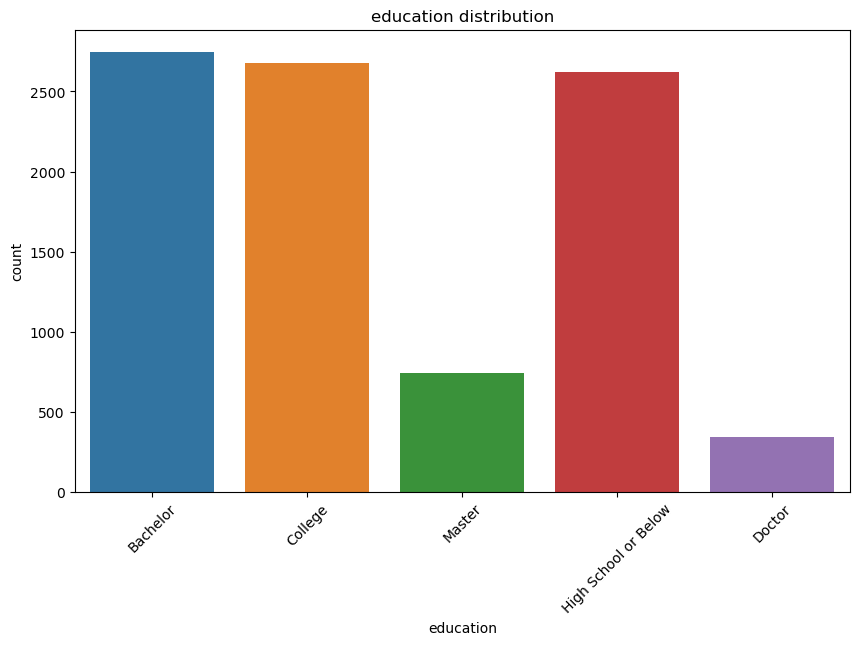

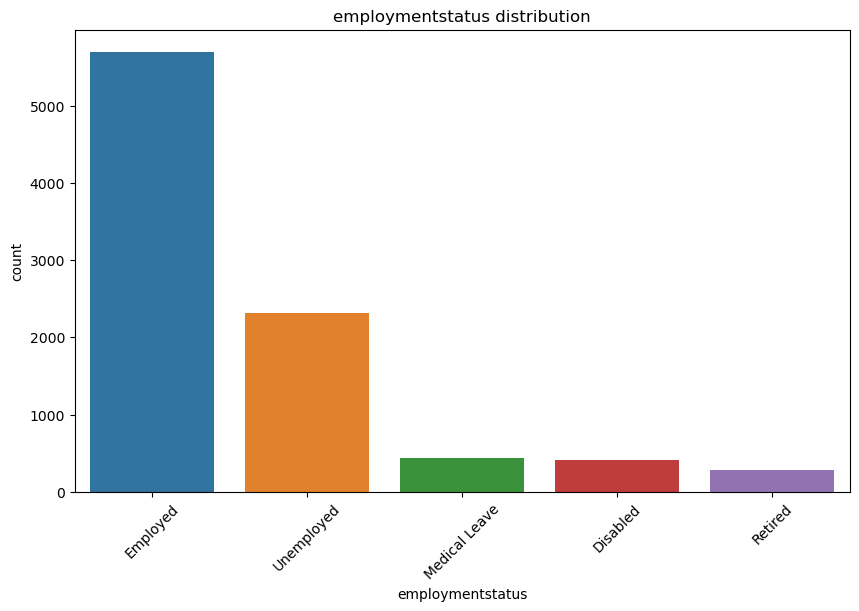

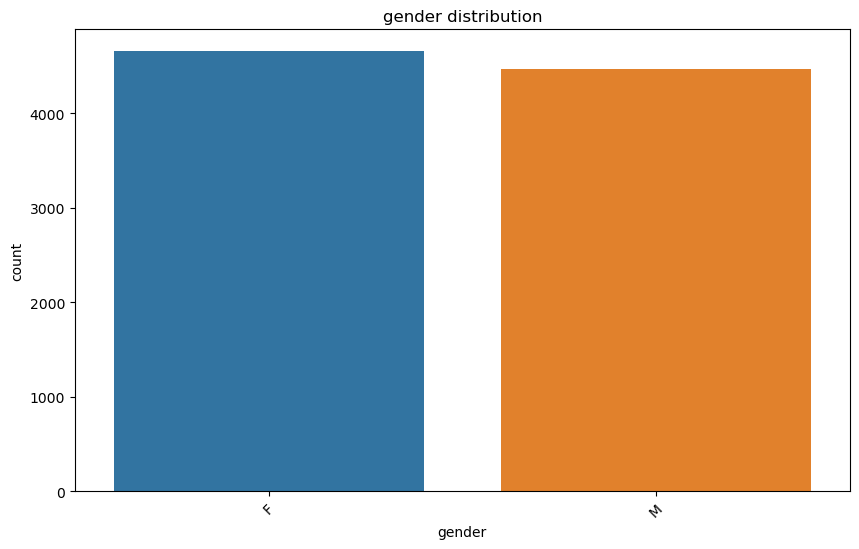

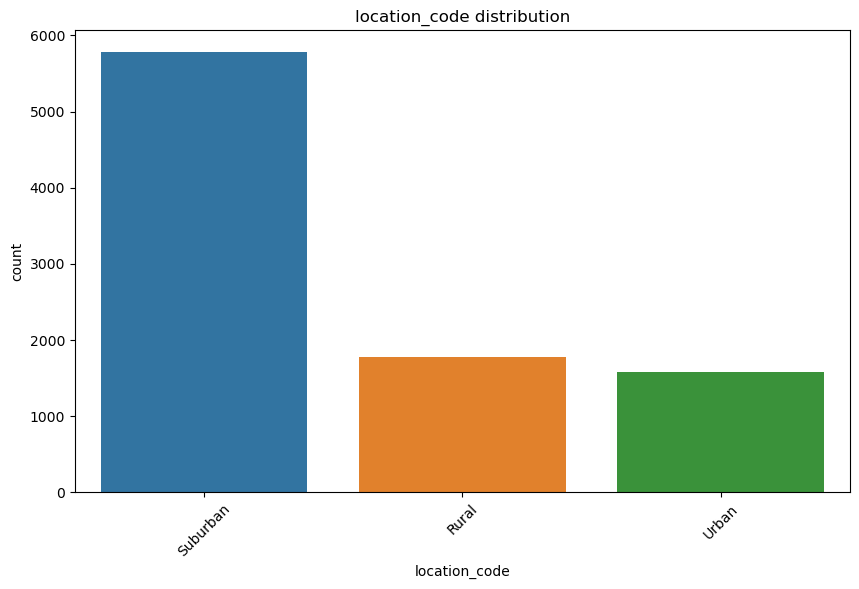

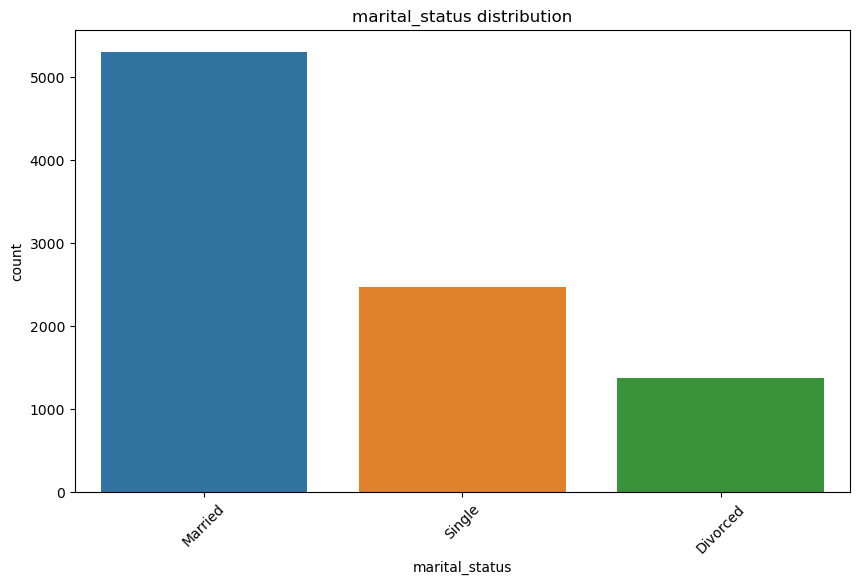

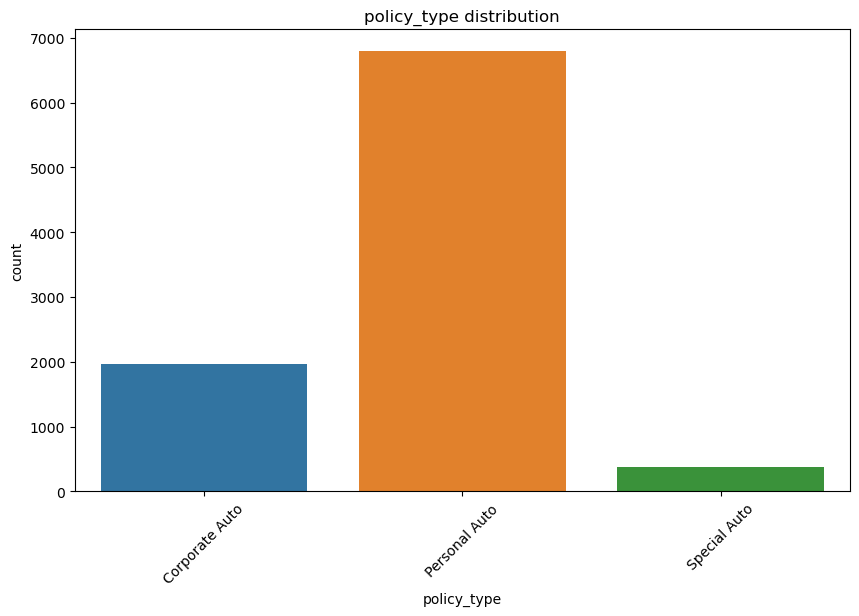

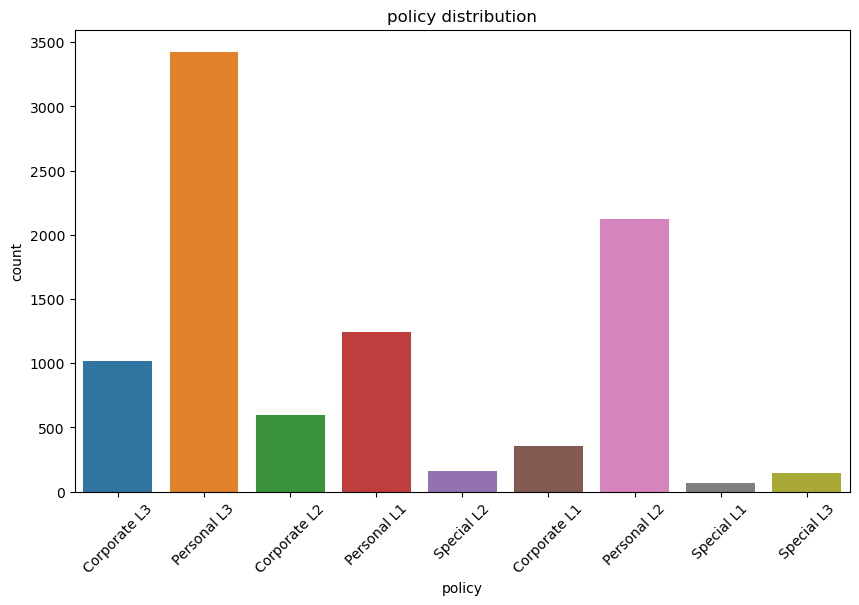

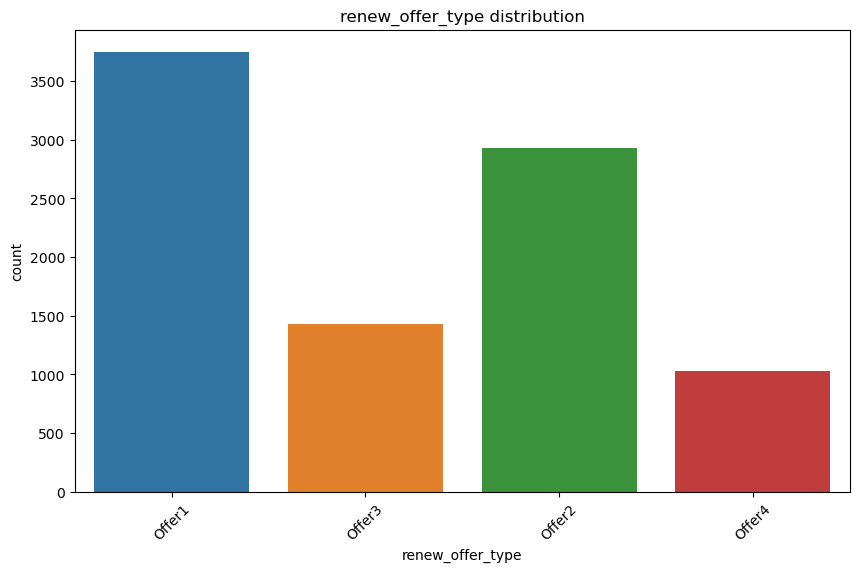

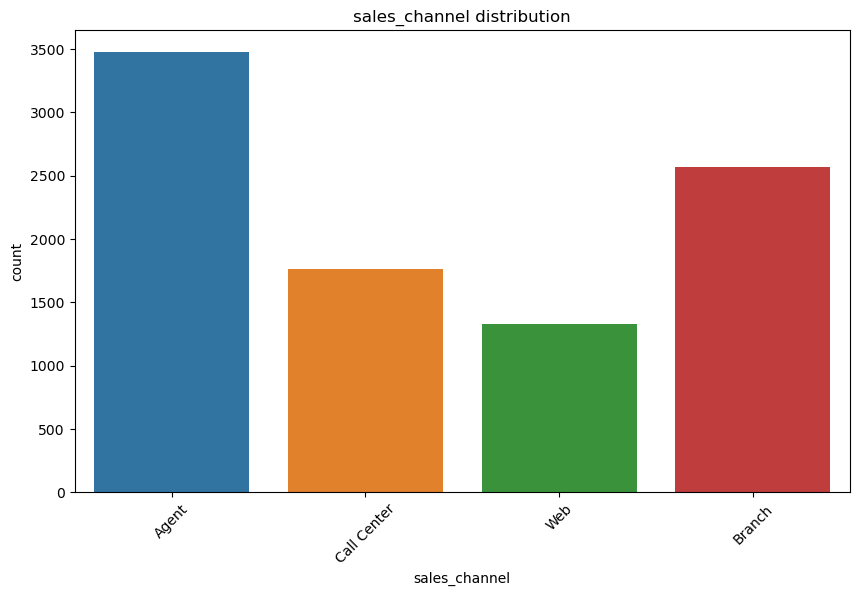

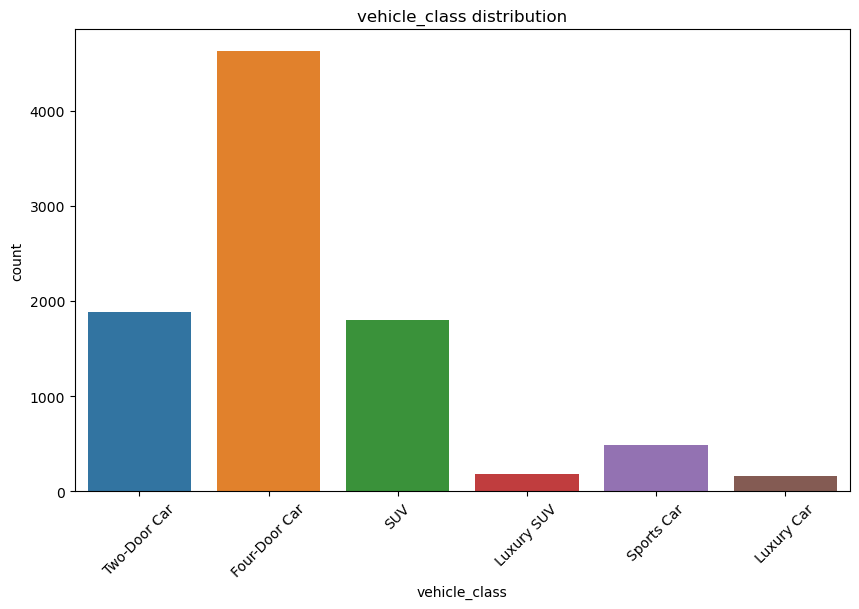

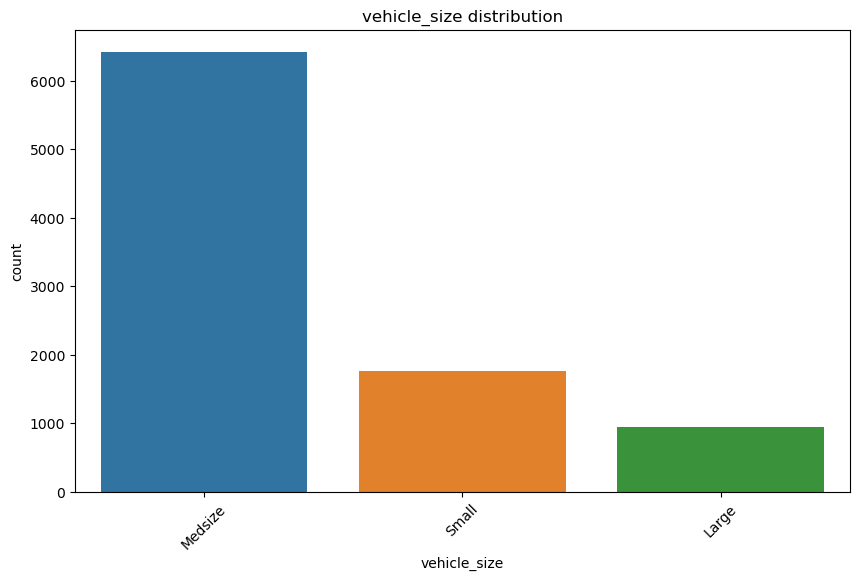

In [81]:
for col in categorical_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=customer_df)
    plt.title(f'{col} distribution')
    plt.xticks(rotation=45)
    plt.show()

In [82]:
# There might be some columns that seem to be redundant, check their values to be sure. What should we do with them? some columns like "policy_type" and "policy" may contain similar information.

In [83]:
customer_df1 = customer_df.copy()

In [84]:
customer_df1.drop('policy_type', axis=1, inplace=True)

In [85]:
# Plot time variable. Can you extract something from it?

In [86]:
# Extract month and year from 'effective_to_date' and create new columns
customer_df1['month'] = customer_df1['effective_to_date'].dt.month
customer_df1['year'] = customer_df1['effective_to_date'].dt.year

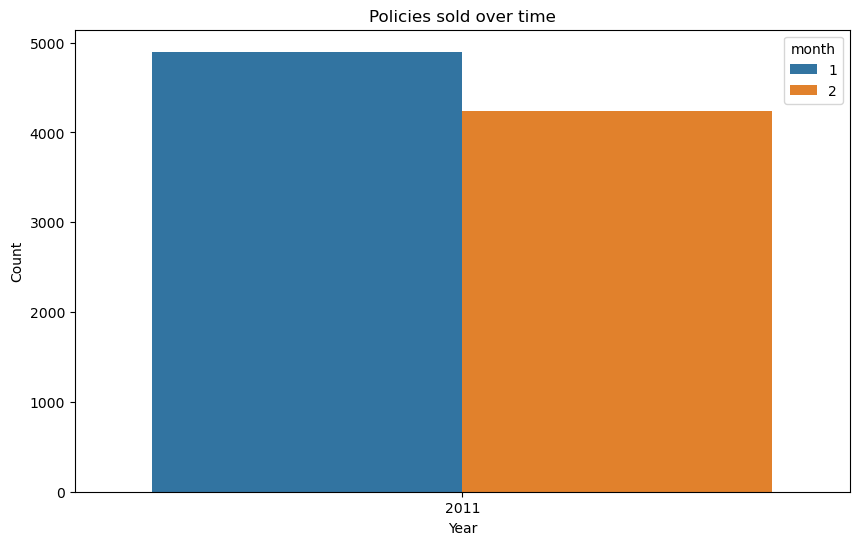

In [87]:
# Plot the number of policies sold over time
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=customer_df1, hue='month')
plt.title('Policies sold over time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()